In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Dataset de análise salarial de Cientistas de Dados e STEM 
#https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries
dataset = "https://raw.githubusercontent.com/Leovsimoes/ReconhecimentoDePadroes/main/Levels_Fyi_Salary_Data.csv"
df = pd.read_csv(dataset)

In [3]:
#listagem das colunas
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [4]:
#uma noção das colunas numéricas
#duas variáveis já foram 'dummiezadas', como o tipo de Degree e raça
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


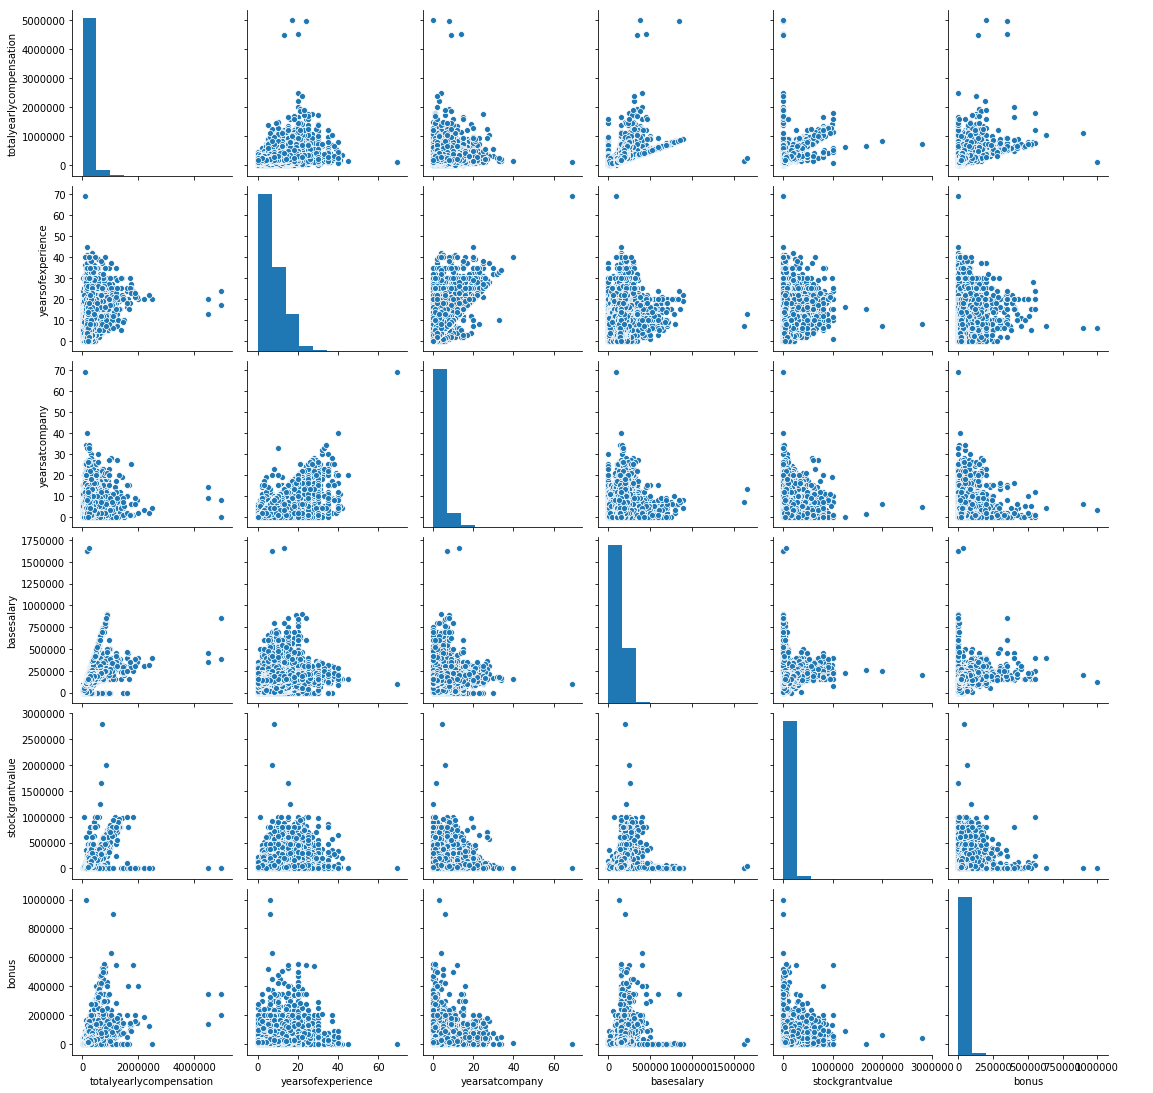

In [5]:
#avaliando a correlação das variáveis numéricas, retirando raça e nível graduação
sns.pairplot(df, vars = ['totalyearlycompensation','yearsofexperience', 'yearsatcompany','basesalary',
       'stockgrantvalue', 'bonus'] )

In [6]:
#visualizando os primeiros valores do dataset
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


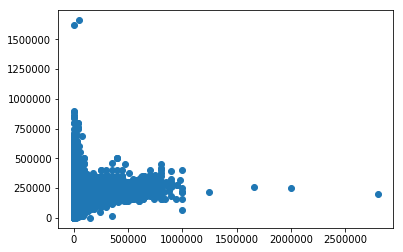

In [7]:
#verificando o gráfico de stockgrantvalue x basesalary
plt.scatter(df['stockgrantvalue'],df['basesalary'])
plt.show()

In [8]:
#para essa tarefa vou manter as variáveis selecionadas acima apenas. stockgrantvalue no eixo X e basesalary como target

#X = df.drop(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation','location', 'tag', 'basesalary', 'gender', 'otherdetails', 'cityid', 'dmaid','rowNumber', 'Race', 'Education'], axis=1)
X = df[['stockgrantvalue']]
y = df['basesalary']

model = LinearRegression()
model.fit(X,y)
ypred = model.predict(X)
mse = mean_squared_error(y,ypred)

print('MSE: '+str(mse))
print('Coef: '+str(model.coef_))
print('Intercept: '+str(model.intercept_))

MSE: 2940317301.413769
Coef: [0.35098999]
Intercept: 118616.18220609975


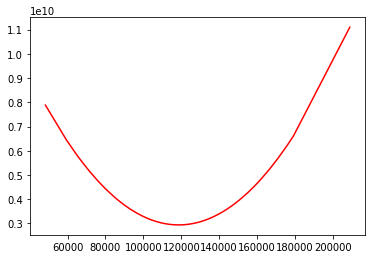

In [14]:
#usando delta como 20%, vou chamar uma distribuição normal com desvio padrão de delta para variar os valores de intercept_, e a partir daí vou aplicar a função linear y = a*X + b conforme mostrado nos vídeos
delta = 0.2
df_mse = pd.DataFrame(columns=['MSE','intercept_'])
#mse = []
#new_intercept_ = []

for i in range(200):
    df_mse.loc[i,'intercept_'] = model.intercept_*(1+np.random.normal(0,delta))
    #new_intercept_.append(model.intercept_*(1+np.random.normal(0,delta)))
    #new_ypred = model.coef_*X + new_intercept_[i]
    new_ypred = model.coef_*X + df_mse.loc[i,'intercept_']
    #mse.append(mean_squared_error(y,new_ypred))
    df_mse.loc[i,'MSE'] = mean_squared_error(y,new_ypred)

#ordenando o dataframe para "limpar" o gráfico
df_mse.sort_values(by='intercept_',inplace=True)

#plotando o intercept_ fica igual uma parábola
plt.plot(df_mse['intercept_'],df_mse['MSE'],'-r')
plt.show()